In [1]:
#Import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
#Load and preprocess the data
data = pd.read_excel('Data.xlsx')
data['Genre'] = data['Genre'].str.split(', ')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')
drama_movies = data[data['Genre'].apply(lambda x: 'Drama' in x)].copy()

In [3]:
#Create feature matrix for Drama movies
drama_genres = set()
for movie_genres in drama_movies['Genre']:
    drama_genres.update(movie_genres)
drama_genres = list(drama_genres)

genre_matrix = np.zeros((len(drama_movies), len(drama_genres)))
for i, movie_genres in enumerate(drama_movies['Genre']):
    for genre in movie_genres:
        genre_matrix[i, drama_genres.index(genre)] = 1

scaler = StandardScaler()
scaled_ratings = scaler.fit_transform(drama_movies[['IMDB_Rating']])
features = np.hstack([genre_matrix, scaled_ratings])

In [4]:
#Calculate similarity matrix
similarity_matrix = cosine_similarity(features)

In [5]:
#Recommendation function
def recommend_movies(movie_title, n=5):
    try:
        idx = drama_movies[drama_movies['Series_Title'] == movie_title].index[0]
        scores = list(enumerate(similarity_matrix[idx]))
        scores = sorted(scores, key=lambda x: x[1], reverse=True)
        scores = scores[1:n+1]
        
        print(f"\nRecommendations similar to '{movie_title}':")
        print("----------------------------------------")
        for i, (movie_idx, score) in enumerate(scores):
            print(f"{i+1}. {drama_movies.iloc[movie_idx]['Series_Title']} ({drama_movies.iloc[movie_idx]['Released_Year']})")
            print(f"   Genre: {', '.join(drama_movies.iloc[movie_idx]['Genre'])}")
            print(f"   IMDB Rating: {drama_movies.iloc[movie_idx]['IMDB_Rating']}")
            print(f"   Similarity: {score:.2f}")
            print("----------------------------------------")
            
        plot_recommendations(movie_title, scores)
        
    except IndexError:
        print("Movie not found in the database.")

In [6]:
#Visualization function
def plot_recommendations(movie_title, scores):
    titles = [drama_movies.iloc[idx]['Series_Title'] for idx, _ in scores]
    similarities = [sim for _, sim in scores]
    years = [drama_movies.iloc[idx]['Released_Year'] for idx, _ in scores]

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(similarities)), similarities, marker='o', linestyle='-', color='blue')
    plt.xticks(range(len(titles)), titles, rotation=45, ha='right')
    plt.ylabel('Similarity Score')
    plt.title(f'Movies similar to "{movie_title}"')

    # Add year labels above the points
    for i, (x, y) in enumerate(zip(range(len(similarities)), similarities)):
        plt.text(x, y + 0.01, str(years[i]), ha='center', fontsize=9)

    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


Recommendations similar to 'The Shawshank Redemption':
----------------------------------------
1. Fight Club (1999)
   Genre: Drama
   IMDB Rating: 8.8
   Similarity: 0.99
----------------------------------------
2. One Flew Over the Cuckoo's Nest (1975)
   Genre: Drama
   IMDB Rating: 8.7
   Similarity: 0.99
----------------------------------------
3. Soorarai Pottru (2020)
   Genre: Drama
   IMDB Rating: 8.6
   Similarity: 0.98
----------------------------------------
4. The Godfather (1972)
   Genre: Crime, Drama
   IMDB Rating: 9.2
   Similarity: 0.98
----------------------------------------
5. The Godfather: Part II (1974)
   Genre: Crime, Drama
   IMDB Rating: 9.0
   Similarity: 0.97
----------------------------------------


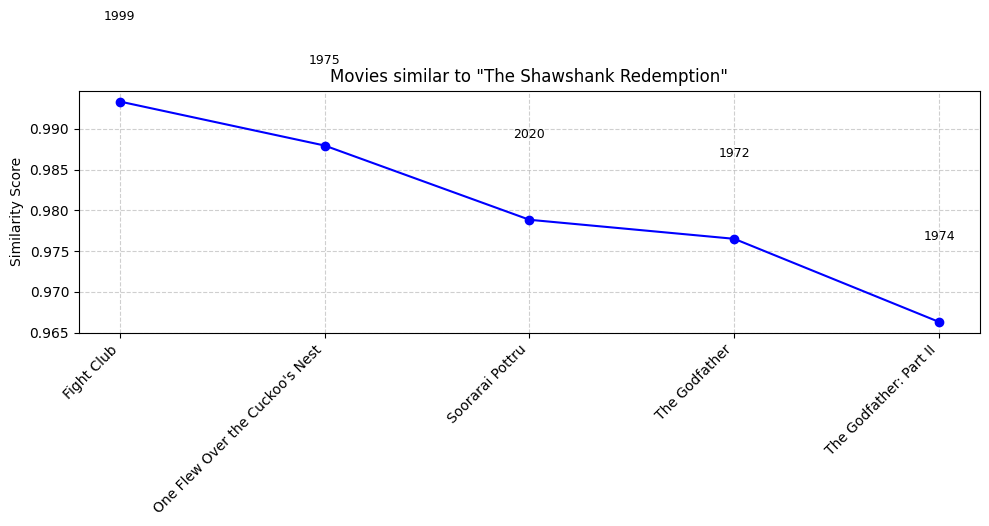


Recommendations similar to 'The Godfather':
----------------------------------------
1. The Godfather: Part II (1974)
   Genre: Crime, Drama
   IMDB Rating: 9.0
   Similarity: 1.00
----------------------------------------
2. 12 Angry Men (1957)
   Genre: Crime, Drama
   IMDB Rating: 9.0
   Similarity: 1.00
----------------------------------------
3. Pulp Fiction (1994)
   Genre: Crime, Drama
   IMDB Rating: 8.9
   Similarity: 1.00
----------------------------------------
4. The Shawshank Redemption (1994)
   Genre: Drama
   IMDB Rating: 9.3
   Similarity: 0.98
----------------------------------------
5. Fight Club (1999)
   Genre: Drama
   IMDB Rating: 8.8
   Similarity: 0.97
----------------------------------------


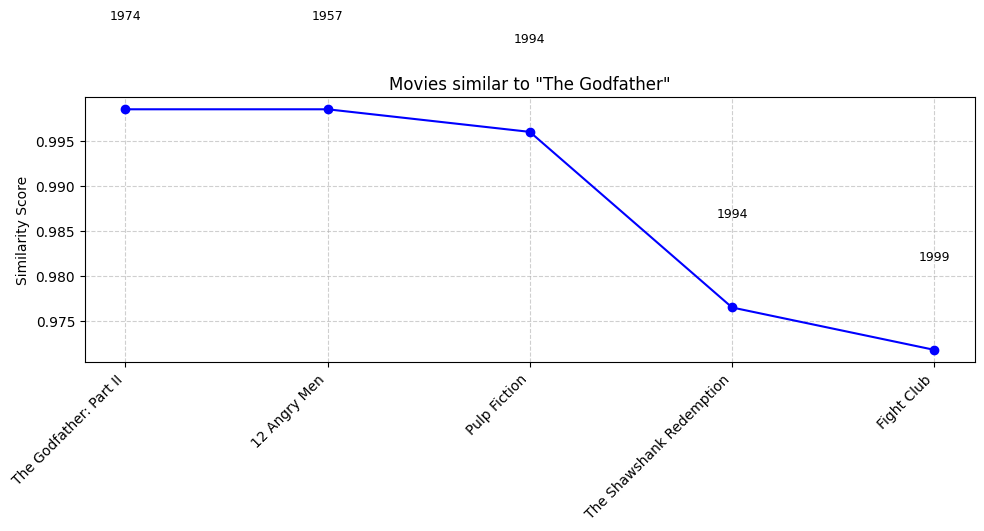

In [7]:
#Example usage
recommend_movies("The Shawshank Redemption")
recommend_movies("The Godfather")